# Import Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings  # Add this import
warnings.filterwarnings("ignore", category=FutureWarning) 

# Read file using pandas.

# View sample data

In [40]:
# Your code to read the dataset
df = pd.read_csv("hazelnut.csv")
# Your code to Print sample dataset
df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [41]:
# Print the shape of the dataframe
df.shape

(201, 12)

# Separate the dataframe into input matrix X and output vector y

In [42]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [44]:
# Your code to separate train and test sixe.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# X_train: Features for training
# X_test: Features for testing
# y_train: Labels for training
# y_test: Labels for testing

# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 11)
Shape of X_test: (81, 11)
Shape of y_train: (120,)
Shape of y_test: (81,)


# Scale the dataset between 0-1.

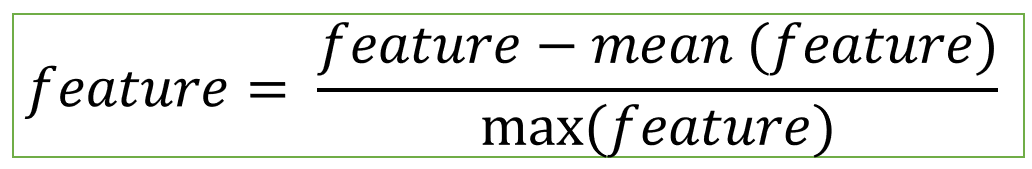

In [45]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [47]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c

# Print accuracy for training and test set.

In [48]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9833333333333333
0.9506172839506173


# Print Classification report - Precision, Recall, and F-score.

In [49]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy:  0.9506172839506173
None


# Display Confusion Matrix

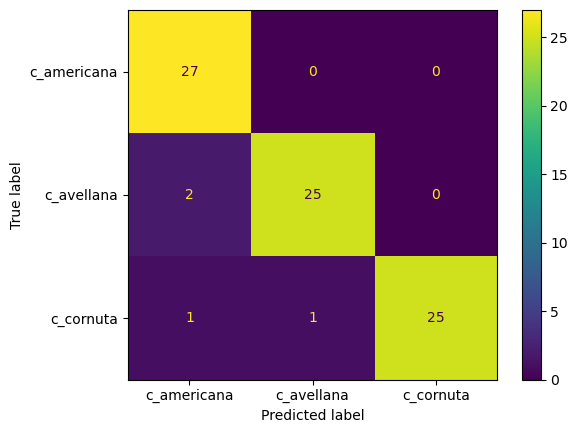

In [50]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

Neighbors: 1, Training Accuracy: 1.0000, Testing Accuracy: 0.9506
Neighbors: 2, Training Accuracy: 0.9917, Testing Accuracy: 0.9383
Neighbors: 3, Training Accuracy: 0.9833, Testing Accuracy: 0.9506
Neighbors: 4, Training Accuracy: 0.9833, Testing Accuracy: 0.9383
Neighbors: 5, Training Accuracy: 0.9750, Testing Accuracy: 0.9506
Neighbors: 6, Training Accuracy: 0.9750, Testing Accuracy: 0.9383
Neighbors: 7, Training Accuracy: 0.9667, Testing Accuracy: 0.9506
Neighbors: 8, Training Accuracy: 0.9750, Testing Accuracy: 0.9383
Neighbors: 9, Training Accuracy: 0.9667, Testing Accuracy: 0.9383
Neighbors: 10, Training Accuracy: 0.9750, Testing Accuracy: 0.9383


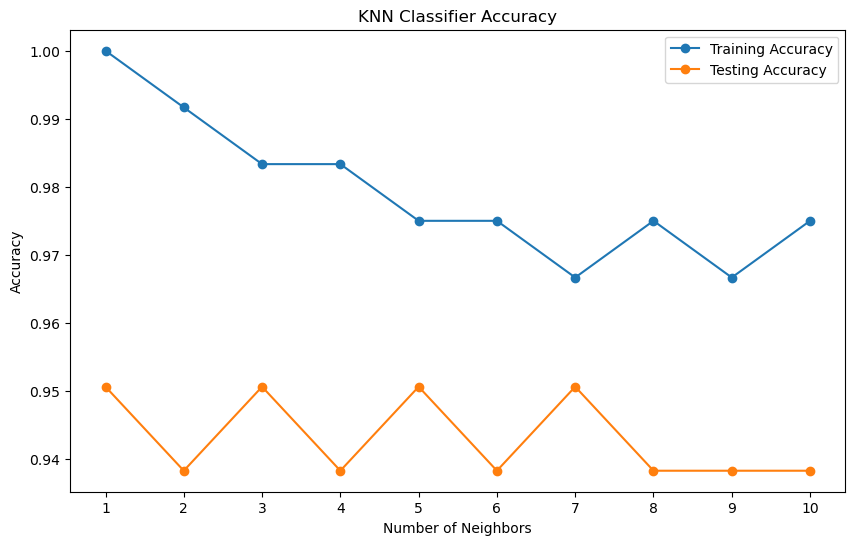

In [51]:
# Your code to create an empty list train_scores
# Your code to create an empty list test_scores
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. You can create numpy array and use np.arange function.

# for ##...... in #.......: # Your code to fill in the for loop.
  # Create a knn classifier object for particular neigbour value.
  # Fit the classifier on X_train, y_train
  # Make predictions on train data.  Store the values in train_pred variable.
  # Make predictions on test data.  Store the values in test_pred variable.
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
  # Append training accuracy in list train_scores.
  # Append test accuracy in list test-scores.

train_scores = []  # Empty list to store training accuracies
test_scores = []   # Empty list to store testing accuracies
neighbours = np.arange(1, 11)  # Array containing values from 1 to 10

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN classifier with k neighbors
    knn.fit(X_train, y_train)  # Fit the classifier on training data
    
    train_pred = knn.predict(X_train)  # Predictions on training data
    test_pred = knn.predict(X_test)    # Predictions on testing data
    
    train_accuracy = accuracy_score(y_train, train_pred)  # Calculate training accuracy
    test_accuracy = accuracy_score(y_test, test_pred)     # Calculate testing accuracy
    
    train_scores.append(train_accuracy)  # Append training accuracy to train_scores list
    test_scores.append(test_accuracy)    # Append testing accuracy to test_scores list

# Print the training and testing accuracies for different neighbor values
for k, train_acc, test_acc in zip(neighbours, train_scores, test_scores):
    print(f"Neighbors: {k}, Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(neighbours, train_scores, marker='o', label='Training Accuracy')
plt.plot(neighbours, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.xticks(neighbours)
plt.legend()
plt.show()


# Plot the accuracy for number of neigbours 1-10.

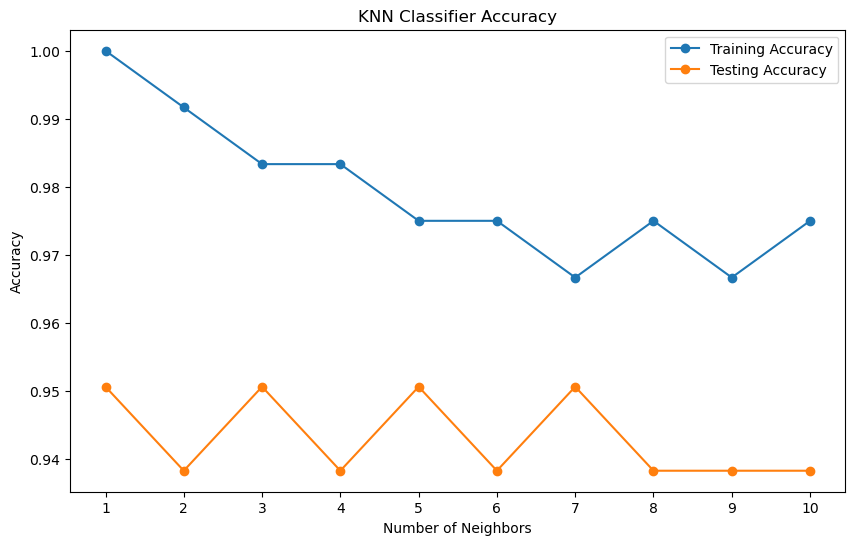

In [52]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'
# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
#

# Plotting the training and testing accuracies for different neighbor values
plt.figure(figsize=(10, 6))
plt.plot(neighbours, train_scores, marker='o', label='Training Accuracy')
plt.plot(neighbours, test_scores, marker='o', label='Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.xticks(neighbours)
plt.legend()
plt.show()


# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


Logistic Regression Training Accuracy: 0.9916666666666667
Logistic Regression Testing Accuracy: 0.9629629629629629
MLP Training Accuracy: 1.0
MLP Testing Accuracy: 0.9629629629629629


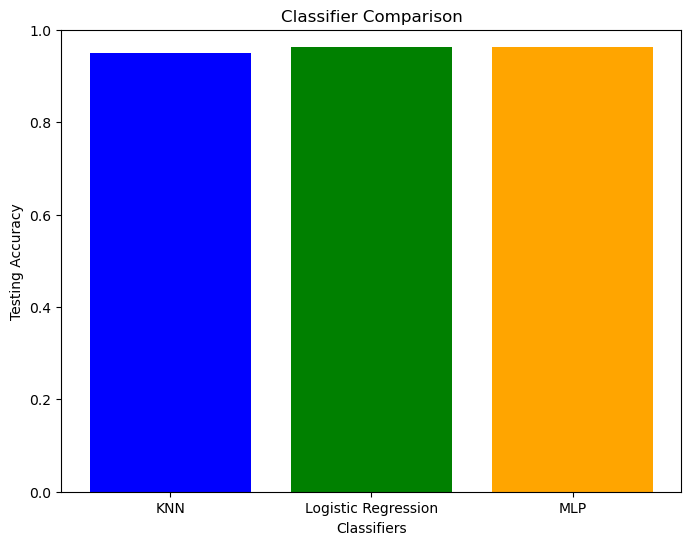

In [62]:
#
# Your code to implement Logistic regression and MLP based classifier.
# You could split this code into multiple cells
#

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt


# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predictions
logreg_train_pred = logreg.predict(X_train)
logreg_test_pred = logreg.predict(X_test)

# Accuracy Scores
logreg_train_accuracy = accuracy_score(y_train, logreg_train_pred)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_pred)

print("Logistic Regression Training Accuracy:", logreg_train_accuracy)
print("Logistic Regression Testing Accuracy:", logreg_test_accuracy)

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predictions
mlp_train_pred = mlp.predict(X_train)
mlp_test_pred = mlp.predict(X_test)

# Accuracy Scores
mlp_train_accuracy = accuracy_score(y_train, mlp_train_pred)
mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)

print("MLP Training Accuracy:", mlp_train_accuracy)
print("MLP Testing Accuracy:", mlp_test_accuracy)

# Data for the bar plot
classifiers = ['KNN', 'Logistic Regression', 'MLP']
accuracies = [max(test_scores), logreg_test_accuracy, mlp_test_accuracy]

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Testing Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0, 1)  # Setting y-axis limit to represent accuracy percentage
plt.show()


# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.